<a href="https://colab.research.google.com/github/gaboojie/project_voting/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plan:
1. Load CSV va_voting data - Gabe
2. Clean data into proper format for ML model - Gabe
3. Split into training and testing data - Naad
4. Choose correct ML model - Naad
5. Perform ML model - Naad
6. Calculate metrics to assess ML model - Ben
7. Create a state map based on 2024 inputs to the model - Ben

In [2]:
# Load CSV va_voting data

import pandas as pd
import numpy as np

csv_df = pd.read_csv("https://raw.githubusercontent.com/gaboojie/project_voting/main/data/voting_VA.csv")

In [3]:
# Clean data into proper format for ML model

# Independent variables to use:
# - Year
# - County Name
# - Total votes
# - Party (Republican or Democrat)

# Dependent variables to use:
# - Candidate votes

# Select the columns from the df that we will use
#df = pd.concat([csv_df['year'], csv_df['county_name'], csv_df['party'], csv_df['totalvotes'], csv_df['candidatevotes']], axis=1)

# Rename columns
df = csv_df.rename(columns={'year': 'Year', 'county_name': 'County Name', 'party': 'Party', 'totalvotes': 'Total Votes', 'candidatevotes': 'Candidate Votes', 'candidate': 'Candidate'})

# Clean Party: only include Republican and Democrat parties, drop any other party rows
df_index = df[ (df['Party'] != 'REPUBLICAN') & (df['Party'] != 'DEMOCRAT') ].index
df = df.drop(df_index)
print("Unique parties:", df['Party'].unique())

# Clean Year: Already looks good
print("Unique years:", df['Year'].unique())

# Clean County name: Already looks good
#print("Unique counties:", df['County Name'].unique())
print('Number of NAs in counties:', df['County Name'].isna().sum())

# Clean total votes: Drop any total where votes are less than 1 (there were two outliers for 2016 in Bedford with a vote count of 0)
df_index = df[df['Total Votes'] <= 0].index
df = df.drop(df_index)
print("Number of NAs in Total Votes:", df['Total Votes'].isna().sum())
#print(df['Total Votes'].unique())

# Merge 2020 absentee, election day, and provisional votes to one candidate vote
county_total_votes = df[['County Name', 'Candidate', 'Year', 'Total Votes']].drop_duplicates()

biden_entries = df[(df['Candidate'] == 'JOSEPH R BIDEN JR') & (df['Year'] == 2020)].groupby(['County Name', 'state', 'state_po', 'office', 'Candidate', 'Year', 'Party', 'county_fips']).agg({'Candidate Votes': 'sum'}).reset_index()
biden_entries = pd.merge(biden_entries, county_total_votes, on=['County Name', 'Candidate', 'Year'], how='left')
df = df[df['Candidate'] != 'JOSEPH R BIDEN JR']
df = pd.concat([df, biden_entries], ignore_index=True)
print(biden_entries)

trump_entries = df[(df['Candidate'] == 'DONALD J TRUMP') & (df['Year'] == 2020)].groupby(['County Name', 'state', 'state_po', 'office', 'Candidate', 'Year', 'Party', 'county_fips']).agg({'Candidate Votes': 'sum'}).reset_index()
trump_entries = pd.merge(trump_entries, county_total_votes, on=['County Name', 'Candidate', 'Year'], how='left')
df = df[df['Candidate'] != 'DONALD J TRUMP']
df = pd.concat([df, trump_entries], ignore_index=True)
print(trump_entries)

# Clean candidate votes: Drop any total where votes are less than 1 (there were two outliers for 2016 in Bedford with a vote count of 0)
df_index = df[df['Candidate Votes'] <= 0].index
df = df.drop(df_index)
print("Number of NAs in Candidate Votes:", df['Total Votes'].isna().sum())
#print(df['Candidate Votes'].unique())

display(df)

Unique parties: ['DEMOCRAT' 'REPUBLICAN']
Unique years: [2000 2004 2008 2012 2016 2020]
Number of NAs in counties: 0
Number of NAs in Total Votes: 0
           County Name     state state_po        office          Candidate  \
0             ACCOMACK  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
1            ALBEMARLE  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
2      ALEXANDRIA CITY  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
3            ALLEGHANY  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
4               AMELIA  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
..                 ...       ...      ...           ...                ...   
128  WILLIAMSBURG CITY  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
129    WINCHESTER CITY  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
130               WISE  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN JR   
131              WYTHE  VIRGINIA       VA  US PRESIDENT  JOSEPH R BIDEN

,Unnamed: 0,Year,state,state_po,County Name,county_fips,office,Candidate,Party,Candidate Votes,Total Votes,version,mode
0,11161.0,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315.0,TOTAL
1,11162.0,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315.0,TOTAL
2,11165.0,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315.0,TOTAL
3,11166.0,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315.0,TOTAL
4,11169.0,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315.0,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,NaN,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,1963,6890,NaN,NaN
1600,NaN,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,5221,12113,NaN,NaN
1601,NaN,2020,VIRGINIA,VA,WISE,51195,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,13366,16615,NaN,NaN
1602,NaN,2020,VIRGINIA,VA,WYTHE,51197,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,11733,15073,NaN,NaN


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Separate the data into training and testing sets
# Testing data is from the year 2020
train_df = df[df['Year'] != 2020]
test_df = df[df['Year'] == 2020]

# Check the distribution of training and testing data
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

train_df.head(), test_df.head()

Training data shape: (1338, 13)
Testing data shape: (266, 13)


(   Unnamed: 0  Year     state state_po County Name  county_fips        office  \
 0     11161.0  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
 1     11162.0  2000  VIRGINIA       VA    ACCOMACK        51001  US PRESIDENT   
 2     11165.0  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   
 3     11166.0  2000  VIRGINIA       VA   ALBEMARLE        51003  US PRESIDENT   
 4     11169.0  2000  VIRGINIA       VA   ALLEGHANY        51005  US PRESIDENT   
 
         Candidate       Party  Candidate Votes  Total Votes     version   mode  
 0         AL GORE    DEMOCRAT             5092        11925  20220315.0  TOTAL  
 1  GEORGE W. BUSH  REPUBLICAN             6352        11925  20220315.0  TOTAL  
 2         AL GORE    DEMOCRAT            16255        36846  20220315.0  TOTAL  
 3  GEORGE W. BUSH  REPUBLICAN            18291        36846  20220315.0  TOTAL  
 4         AL GORE    DEMOCRAT             2214         5123  20220315.0  TOTAL  ,
       Unname

In [5]:
# Create a linear regression model using the train data
X_train = pd.concat([
    pd.get_dummies(train_df['Candidate'], dtype='int'),
    pd.get_dummies(train_df['County Name'], dtype='int'),
    pd.get_dummies(train_df['Party'], dtype='int'),
    train_df[['Total Votes']]
], axis=1)
X_train.columns = X_train.columns.astype(str)
y_train = train_df['Candidate Votes']

X = pd.get_dummies(df['Candidate'], dtype='int')  # One-hot encode the 'Candidate' column
X_party = pd.get_dummies(df['Party'], dtype='int')  # One-hot encode the 'Party' column
X_county = pd.get_dummies(df['County Name'], dtype='int') # One-hot encode the 'County Name' column
y = df['Candidate Votes']  # Assuming 'Candidate Votes' is your target variable

# Add the 'Total Votes' column as an additional feature
X['Total Votes'] = df['Total Votes']

# Use PolynomialFeatures to generate interaction terms up to degree 2
expander = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = expander.fit_transform(X)

# Convert X_interactions to a DataFrame
X_interactions_df = pd.DataFrame(X_interactions, columns=expander.get_feature_names_out(X.columns))

# Concatenate X_interactions_df with the other dummy variables
X_final = pd.concat([X_interactions_df, X_party, X_county], axis=1)

# Fit a linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_final, y)

results = pd.DataFrame({'Variables':reg.feature_names_in_, 'Coefficient':reg.coef_})
results





,Variables,Coefficient
0,AL GORE,-4.819594e+07
1,BARACK OBAMA,-4.819724e+07
2,DONALD J TRUMP,7.664185e+10
3,DONALD TRUMP,7.664185e+10
4,GEORGE W. BUSH,7.664184e+10
...,...,...
230,WINCHESTER,-4.000231e+08
231,WINCHESTER CITY,-4.000231e+08
232,WISE,-4.000230e+08
233,WYTHE,-4.000230e+08


In [6]:
X_test = pd.concat([
    pd.get_dummies(test_df['Year'], dtype='int'),
    pd.get_dummies(test_df['County Name'], dtype='int'),
    pd.get_dummies(test_df['Party'], dtype='int'),
    test_df[['Total Votes']]
], axis=1)
X_test.columns = X_test.columns.astype(str)
y_test = test_df['Candidate Votes']

# Calculate R^2
r2 = reg.score(X_final, y)
print('R_squared: ', r2)

R_squared:  0.9661787960748086


In [7]:
# Calculate total votes growth rates
total_votes = df.groupby(['County Name', 'Year'])['Total Votes'].sum().reset_index()

# Merge DataFrame with itself, shifted by one term, to align total votes for consecutive
total_votes_shifted = total_votes.copy()
total_votes_shifted['Year'] = total_votes_shifted['Year'] + 4
total_votes_merged = pd.merge(total_votes, total_votes_shifted, on=['County Name', 'Year'], suffixes=('', '_prev'), how='left')

# Calculate growth rate as the percentage change between total votes in current term and previous term
total_votes_merged['Growth Rate'] = ((total_votes_merged['Total Votes'] - total_votes_merged['Total Votes_prev']) / total_votes_merged['Total Votes_prev']) * 100
print(total_votes_merged)

average_growth_rate = total_votes_merged.groupby('County Name')['Growth Rate'].mean().reset_index()

# Display the average growth rate per county
print(average_growth_rate)
average_growth_rate.head()

    County Name  Year  Total Votes  Total Votes_prev  Growth Rate
0      ACCOMACK  2000        23850               NaN          NaN
1      ACCOMACK  2004        26712           23850.0    12.000000
2      ACCOMACK  2008        31246           26712.0    16.973645
3      ACCOMACK  2012        32102           31246.0     2.739551
4      ACCOMACK  2016        31636           32102.0    -1.451623
..          ...   ...          ...               ...          ...
773        YORK  2004        59760           49166.0    21.547411
774        YORK  2008        67794           59760.0    13.443775
775        YORK  2012        67906           67794.0     0.165206
776        YORK  2016        68236           67906.0     0.485966
777        YORK  2020        77582           68236.0    13.696582

[778 rows x 5 columns]
         County Name  Growth Rate
0           ACCOMACK     7.498768
1          ALBEMARLE    12.042985
2         ALEXANDRIA     8.342775
3    ALEXANDRIA CITY          NaN
4          ALL

,County Name,Growth Rate
0,ACCOMACK,7.498768
1,ALBEMARLE,12.042985
2,ALEXANDRIA,8.342775
3,ALEXANDRIA CITY,NaN
4,ALLEGHANY,10.861802


In [8]:
# Use growth rates and 2020 total votes to derive 2024 total votes
estimated_votes_2024 = total_votes_merged[['County Name', 'Year', 'Total Votes']]
df_index = estimated_votes_2024[estimated_votes_2024['Year'] != 2020].index
estimated_votes_2024 = estimated_votes_2024.drop(df_index)
estimated_votes_2024 = pd.merge(estimated_votes_2024, average_growth_rate, on=['County Name'], how='left')
estimated_votes_2024['Estimated Total Votes 2024'] = estimated_votes_2024['Total Votes'] * (1 + average_growth_rate['Growth Rate'] / 100)
print(estimated_votes_2024)

           County Name  Year  Total Votes  Growth Rate  \
0             ACCOMACK  2020        33924     7.498768   
1            ALBEMARLE  2020       129314    12.042985   
2      ALEXANDRIA CITY  2020       165042          NaN   
3            ALLEGHANY  2020        16406    10.861802   
4               AMELIA  2020        15788    10.708869   
..                 ...   ...          ...          ...   
128  WILLIAMSBURG CITY  2020        13780          NaN   
129    WINCHESTER CITY  2020        24226          NaN   
130               WISE  2020        33230     4.615644   
131              WYTHE  2020        30146     8.195736   
132               YORK  2020        77582     9.867788   

     Estimated Total Votes 2024  
0                  36467.882026  
1                 144887.264999  
2                 178811.082656  
3                           NaN  
4                  17502.861378  
..                          ...  
128                14921.414350  
129                         NaN

In [9]:
# Use linear regression model to predict democrat and republican votes
dem_df = pd.merge(df, estimated_votes_2024[['County Name', 'Estimated Total Votes 2024']], on='County Name', how='left')
dem_df = dem_df.drop(['Total Votes'], axis=1)
dem_df = dem_df.rename(columns={'Estimated Votes 2024': 'Total Votes'})

X = pd.get_dummies(df['Candidate'], dtype='int')  # One-hot encode the 'Candidate' column
X_party = pd.get_dummies(df['Party'], dtype='int')  # One-hot encode the 'Party' column
X_county = pd.get_dummies(df['County Name'], dtype='int') # One-hot encode the 'County Name' column
# Add the 'Total Votes' column as an additional feature
X['Total Votes'] = df['Total Votes']

# Use PolynomialFeatures to generate interaction terms up to degree 2
expander = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = expander.fit_transform(X)

# Convert X_interactions to a DataFrame
X_interactions_df = pd.DataFrame(X_interactions, columns=expander.get_feature_names_out(X.columns))

# Concatenate X_interactions_df with the party dummy variables
X_final = pd.concat([X_interactions_df, X_party, X_county], axis=1)

df_index = X_final[X_final['JOSEPH R BIDEN JR'] != 1].index
reg_dem_df = X_final.drop(df_index)
df_index = dem_df[dem_df['Candidate'] != 'JOSEPH R BIDEN JR'].index
dem_df = dem_df.drop(df_index)

dem_df['Candidate Votes'] = reg.predict(reg_dem_df)
print(dem_df)
dem_df.head()

rep_df = pd.merge(df, estimated_votes_2024[['County Name', 'Estimated Total Votes 2024']], on='County Name', how='left')
rep_df = rep_df.drop(['Total Votes'], axis=1)
rep_df = rep_df.rename(columns={'Estimated Votes 2024': 'Total Votes'})
# Add the 'Total Votes' column as an additional feature
X = pd.get_dummies(df['Candidate'], dtype='int')  # One-hot encode the 'Candidate' column
X_party = pd.get_dummies(df['Party'], dtype='int')  # One-hot encode the 'Party' column
X_county = pd.get_dummies(df['County Name'], dtype='int') # One-hot encode the 'County Name' column
X['Total Votes'] = df['Total Votes']

# Use PolynomialFeatures to generate interaction terms up to degree 2
expander = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = expander.fit_transform(X)

# Convert X_interactions to a DataFrame
X_interactions_df = pd.DataFrame(X_interactions, columns=expander.get_feature_names_out(X.columns))

# Concatenate X_interactions_df with the party dummy variables
X_final = pd.concat([X_interactions_df, X_party, X_county], axis=1)

df_index = X_final[X_final['DONALD J TRUMP'] != 1].index
reg_rep_df = X_final.drop(df_index)
df_index = rep_df[rep_df['Candidate'] != 'DONALD J TRUMP'].index
rep_df = rep_df.drop(df_index)

rep_df['Candidate Votes'] = reg.predict(reg_rep_df) * -1
print(rep_df)


      Unnamed: 0  Year     state state_po        County Name  county_fips  \
1338         NaN  2020  VIRGINIA       VA           ACCOMACK        51001   
1339         NaN  2020  VIRGINIA       VA          ALBEMARLE        51003   
1340         NaN  2020  VIRGINIA       VA    ALEXANDRIA CITY        51510   
1341         NaN  2020  VIRGINIA       VA          ALLEGHANY        51005   
1342         NaN  2020  VIRGINIA       VA             AMELIA        51007   
...          ...   ...       ...      ...                ...          ...   
1466         NaN  2020  VIRGINIA       VA  WILLIAMSBURG CITY        51830   
1467         NaN  2020  VIRGINIA       VA    WINCHESTER CITY        51840   
1468         NaN  2020  VIRGINIA       VA               WISE        51195   
1469         NaN  2020  VIRGINIA       VA              WYTHE        51197   
1470         NaN  2020  VIRGINIA       VA               YORK        51199   

            office          Candidate     Party  Candidate Votes  version  

In [10]:
# Calcute net votes for each county using predicted values
df_2024 = pd.concat([dem_df, rep_df], ignore_index=True)

df_2024 = df_2024.groupby(['County Name', 'county_fips'])['Candidate Votes'].sum().reset_index()

print(df_2024)

           County Name  county_fips  Candidate Votes
0             ACCOMACK        51001     -2408.759674
1            ALBEMARLE        51003     14250.927826
2      ALEXANDRIA CITY        51510     20490.802826
3            ALLEGHANY        51005     -5468.275299
4               AMELIA        51007     -5576.212799
..                 ...          ...              ...
128  WILLIAMSBURG CITY        51830     -5926.900299
129    WINCHESTER CITY        51840     -4102.478424
130               WISE        51195     -2529.947174
131              WYTHE        51197     -3068.554134
132               YORK        51199      5216.039616

[133 rows x 3 columns]


In [21]:
!pip install mapclassify

In [41]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file('/content/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('https://raw.githubusercontent.com/gaboojie/project_voting/main/data/county_adjacencies.csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

<Axes: >

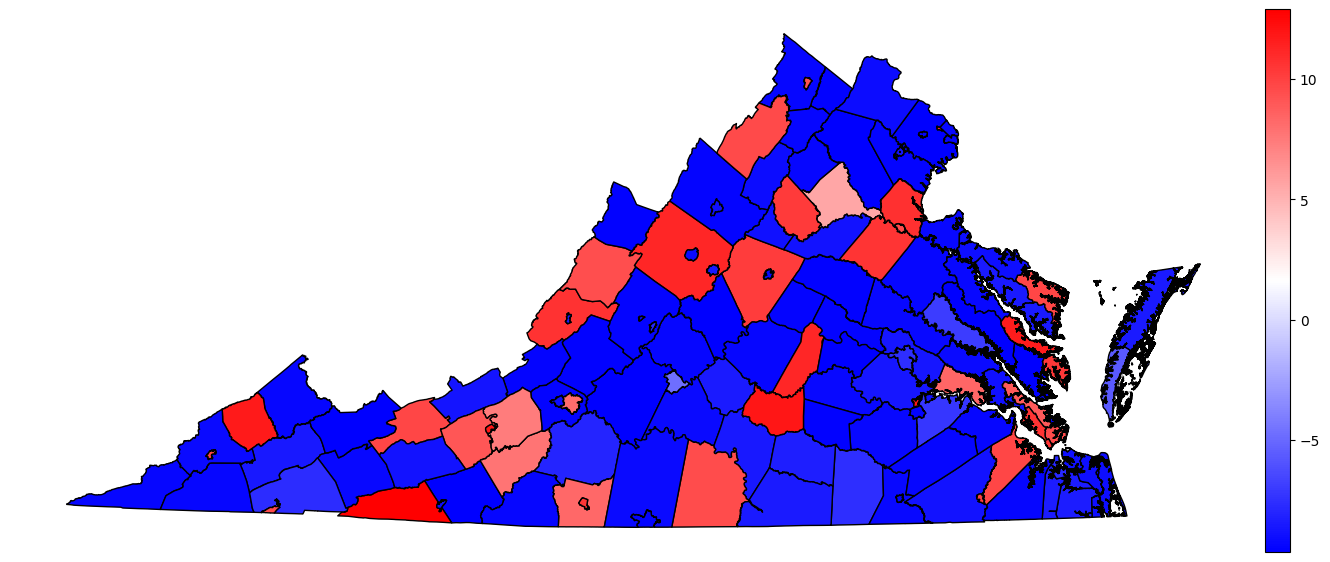

In [43]:
df['vote_diff_ihs'] = np.arcsinh(df_2024['Candidate Votes'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')